# Preprocessing Quality Control And R&D

In [1]:
import os
from satpy import Scene
from h5py import File
import numpy as np
from pyresample.geometry import create_area_def
import datetime
import cv2
import matplotlib.pyplot as plt

In [2]:
DATA_DIR = '../data'

In [3]:
orignal_radar_images = os.listdir(f"{DATA_DIR}/radar/")

In [4]:
test_original_radar_image = f"{DATA_DIR}/radar/{orignal_radar_images[100]}"

In [5]:
radarFile = File(test_original_radar_image)
len(orignal_radar_images)

7470

In [6]:
copy_of_data = np.array(radarFile['reflectivity'])
fat_bins = np.array(radarFile['reflectivity'])

copy_of_data[copy_of_data >= 255] = 0

In [7]:
radarFile['overview'].attrs.keys()

<KeysViewHDF5 ['hdftag_version_number', 'number_image_groups', 'number_radar_groups', 'number_satellite_groups', 'number_stations_groups', 'product_datetime_end', 'product_datetime_start', 'product_group_name', 'products_missing']>

In [8]:
np.max(radarFile['reflectivity'])

255

In [9]:
radarFile['reflectivity'].attrs.keys()

<KeysViewHDF5 ['calibration_flag', 'calibration_formulas', 'calibration_missing_data', 'calibration_out_of_image']>

In [10]:
radarFile['reflectivity'].attrs["calibration_flag"]

b'Y'

In [11]:
radarFile['reflectivity'].attrs["calibration_formulas"]

b'GEO = 0.500000 * PV + -32.000000'

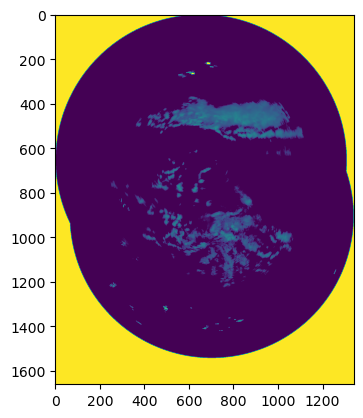

In [12]:
plt.imshow(radarFile['reflectivity'])

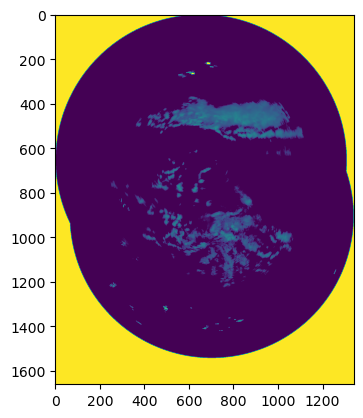

In [13]:
plt.imshow(fat_bins)

In [14]:
copy_of_data = (copy_of_data * 0.5) - 32

In [15]:
copy_of_data[copy_of_data <= 0] = 0 # no rain
copy_of_data[(copy_of_data > 5) & ( copy_of_data <= 10)] = 1
copy_of_data[(copy_of_data > 10) & ( copy_of_data <= 15)] = 2
copy_of_data[(copy_of_data > 20 ) & (copy_of_data <= 25)] = 3
copy_of_data[(copy_of_data > 25 ) & (copy_of_data <= 30)] = 4
copy_of_data[(copy_of_data > 30) & (copy_of_data <= 35)] = 5
copy_of_data[(copy_of_data > 35 ) & (copy_of_data <= 40)] = 6
copy_of_data[(copy_of_data > 40 ) & (copy_of_data <= 45)] = 7
copy_of_data[(copy_of_data > 45 ) & (copy_of_data <= 50)] = 8
copy_of_data[(copy_of_data > 50 ) & (copy_of_data <= 55)] = 9
copy_of_data[(copy_of_data > 55 ) & (copy_of_data <= 60)] = 10
copy_of_data[(copy_of_data > 60 ) & (copy_of_data <= 65)] = 11
copy_of_data[copy_of_data > 65] = 12

In [16]:
def binify(array):
    class_counter = 0
    array[array <= 0] = class_counter
    class_counter += 1
    for i in range(0, 60, 5):
        array[(array > i) & (array <= i + 5)]
        class_counter += 1
    array[array > 65] = class_counter
    return array

In [17]:
s = 0
for i in range(0, 60, 5):
    print(s)
    s += 1

0
1
2
3
4
5
6
7
8
9
10
11


In [18]:
fat_bins = np.array(radarFile['reflectivity'])

In [19]:
fat_bins = (fat_bins * 0.5) - 32

In [20]:
def binifyy(array):
    array[array <= 0] = 0
    array[(array > 0) & ( array<= 30)] = 1
    array[(array > 20) & ( array<= 65)] = 2
    array[array > 65] = 3
    return array

In [21]:
fat_bins_bined = binify(fat_bins)

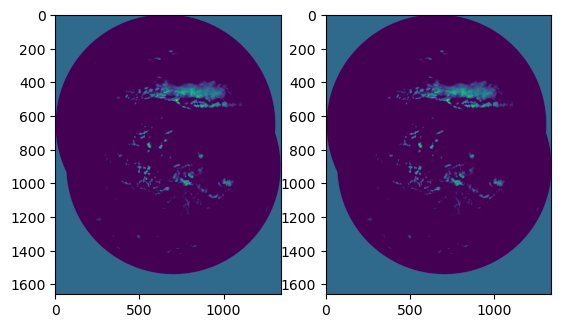

In [22]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(fat_bins)
axes[1].imshow(fat_bins_bined)

In [23]:
fat_bins[]

SyntaxError: invalid syntax (429024890.py, line 1)

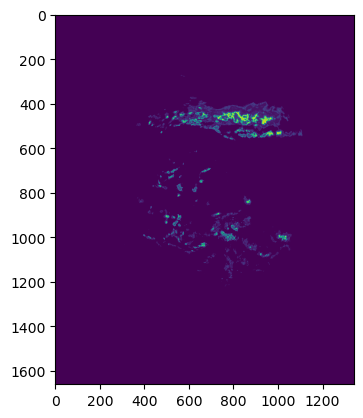

In [24]:
plt.imshow(copy_of_data)

In [25]:
np.max(copy_of_data)

20.0

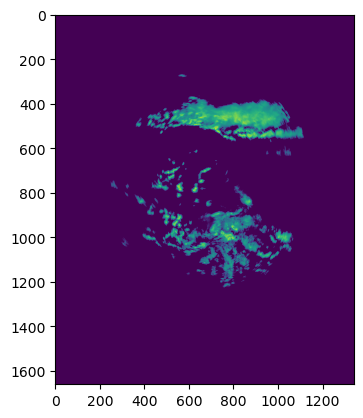

In [26]:
testss = f"{DATA_DIR}/radar/{orignal_radar_images[192]}"
radarFile = File(test_original_radar_image)
copy_of_data = np.array(radarFile['reflectivity'])
copy_of_data[copy_of_data >= 255] = 0
plt.imshow(copy_of_data)

## Evaluate Preprocessing of Satellite Images

In [31]:
satellite_files = [f"{DATA_DIR}/preprocessed/satellite/{x}" for x in os.listdir(f"{DATA_DIR}/preprocessed/satellite")]

In [32]:
satfile = np.load(satellite_files[200])

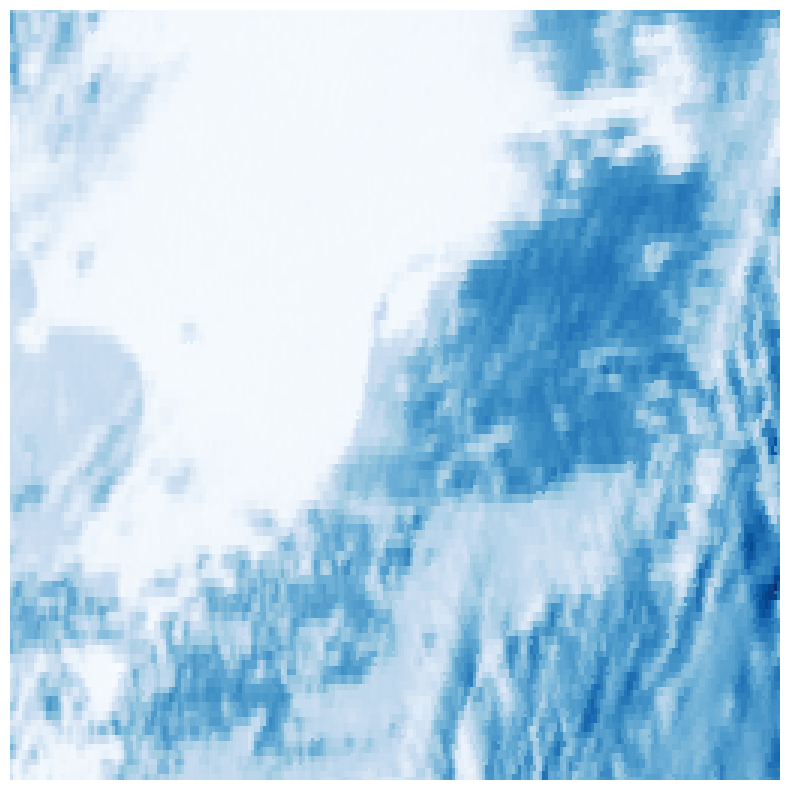

In [34]:
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(satfile[0], cmap="Blues")

In [30]:
satfile

array([[[0.0019682 , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.0019682 , 0.0019682 , 0.0019682 , ..., 0.        ,
         0.        , 0.        ],
        [0.0019682 , 0.0019682 , 0.0019682 , ..., 0.        ,
         0.        , 0.0019682 ],
        ...,
        [0.        , 0.0019682 , 0.        , ..., 0.0019682 ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.0019682 ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.0019682 , 0.        ]],

       [[0.77197827, 0.78308644, 0.78308644, ..., 0.78792905,
         0.80411073, 0.81083064],
        [0.77780201, 0.77780201, 0.77780201, ..., 0.78792905,
         0.80411073, 0.81083064],
        [0.77780201, 0.77780201, 0.77780201, ..., 0.78792905,
         0.80411073, 0.81689727],
        ...,
        [0.79240257, 0.80756179, 0.82243429, ..., 0.87980218,
         0.87624151, 0.87624151],
        [0.8

In [31]:
np.max(satfile[0])

0.00590460475180663

In [32]:
np.min(satfile[0])

0.0

In [33]:
np.min(satfile)

0.0

In [34]:
np.max(satfile)

0.9815039168511867

In [36]:
bin1 = np.load('../data/preprocessed/radar-binned/radar_nl_202303100005.npy')

(-0.5, 1339.5, 1659.5, -0.5)

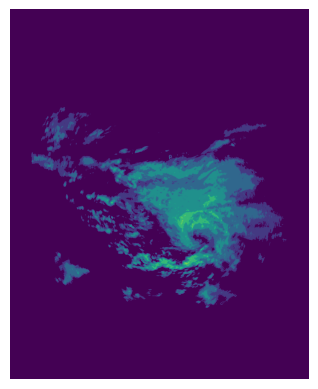

In [37]:
plt.imshow(bin1)
plt.axis('off')

In [5]:
np.max(bin1)

8.32598876953125